<a href="https://colab.research.google.com/github/sonam-pankaj95/IkigAI/blob/main/projection_debiasing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
stereotype_pairs = [
 ('teacher', 'editor'),
 ('doctor', 'nurse'),
 ('engineer', 'accountant'),
 ('assistant', 'auditor'),
 ('driver', 'writer'),
 ('sheriff', 'baker'),
 ('mover', 'clerk'),
 ('developer', 'cashier'),
 ('farmer', 'counselor'),
 ('guard', 'attendant'),
 ('chief', 'teacher'),
 ('janitor', 'sewer'),
 ('lawyer', 'librarian'),
 ('cook', 'assistant'),
 ('physician', 'cleaner'),
 ('CEO', 'housekeeper'),
 ('analyst', 'nurse'),
 ('manager', 'receptionist'),
 ('supervisor', 'hairdresser'),
 ('salesperson', 'secretary')]

appropriate_pairs = [
    ('woman', 'man'),
    ('she', 'he'),
    ('her', 'him'),
    ('girl', 'boy')
]

random_pairs = [
    ('dog', 'firehydrant'),
    ('carpet', 'leg'),
    ('hot', 'cold'),
]

all_pairs = [stereotype_pairs, appropriate_pairs, random_pairs]

In [ ]:
!pip install whatlies

     |████████████████████████████████| 85 kB 2.3 MB/s 
     |████████████████████████████████| 24.2 MB 1.4 MB/s 
     |████████████████████████████████| 1.2 MB 60.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
!pip install whatlies[tfhub]
!pip install whatlies[transformers]

     |████████████████████████████████| 4.9 MB 4.4 MB/s 
     |████████████████████████████████| 394.5 MB 35 kB/s 
     |████████████████████████████████| 462 kB 39.0 MB/s 
     |████████████████████████████████| 2.9 MB 41.9 MB/s 
     |████████████████████████████████| 14.8 MB 41.1 MB/s 
     |████████████████████████████████| 3.8 MB 39.2 MB/s 
     |████████████████████████████████| 132 kB 49.3 MB/s 
     |████████████████████████████████| 4.9 MB 44.0 MB/s 
     |████████████████████████████████| 4.9 MB 20.9 MB/s 
     |████████████████████████████████| 4.4 MB 49.9 MB/s 
     |████████████████████████████████| 4.3 MB 30.8 MB/s 
     |████████████████████████████████| 3.4 MB 5.5 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68725 sha256=f33acbfbedfb6840de60ca40b18928c5eef988d8575fc1defab4ae034beb4dc3
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting 

     |████████████████████████████████| 4.0 MB 4.1 MB/s 
     |████████████████████████████████| 6.5 MB 45.9 MB/s 
     |████████████████████████████████| 596 kB 47.6 MB/s 
     |████████████████████████████████| 77 kB 6.5 MB/s 
     |████████████████████████████████| 895 kB 71.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


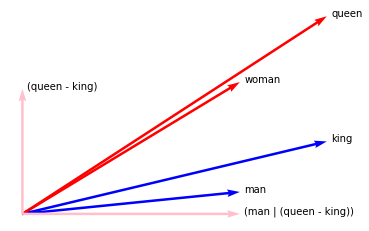

In [ ]:
from whatlies import Embedding
import matplotlib.pylab as plt

man   = Embedding("man", [0.5, 0.1])
woman = Embedding("woman", [0.5, 0.6])
king  = Embedding("king", [0.7, 0.33])
queen = Embedding("queen", [0.7, 0.9])

man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="blue")
queen.plot(kind="arrow", color="red")

(queen - king).plot(kind="arrow", color="pink", show_ops=True)
(man | (queen - king)).plot(kind="arrow", color="pink", show_ops=True)
plt.axis('off');

downloading https://nlp.h-its.org/bpemb/en/en.wiki.bpe.vs10000.model


100%|██████████| 400869/400869 [00:01<00:00, 312168.45B/s]


downloading https://nlp.h-its.org/bpemb/en/en.wiki.bpe.vs10000.d100.w2v.bin.tar.gz


100%|██████████| 3784656/3784656 [00:02<00:00, 1825692.23B/s]


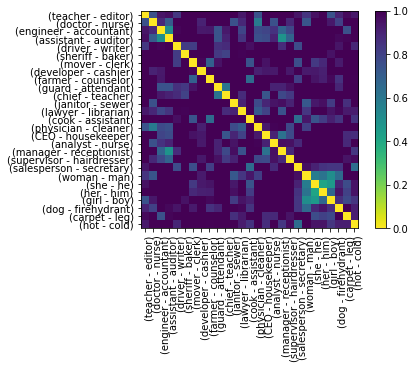

In [ ]:
from whatlies import Embedding, EmbeddingSet
from whatlies.language import BytePairLanguage

lang_ft = BytePairLanguage(lang = 'en')

flatten = lambda l: [item for sublist in l for item in sublist]

def calc_axis(pair_list, language_model):
    return [language_model[t1] - language_model[t2] for (t1, t2) in pair_list]

def make_correlation_plot(pairs, language_model, metric="cosine"):
    axes = [calc_axis(p, language_model) for p in pairs]
    emb_pairs = EmbeddingSet(*flatten(axes))
    emb_pairs.plot_distance(metric=metric)

make_correlation_plot(pairs=all_pairs, language_model=lang_ft)

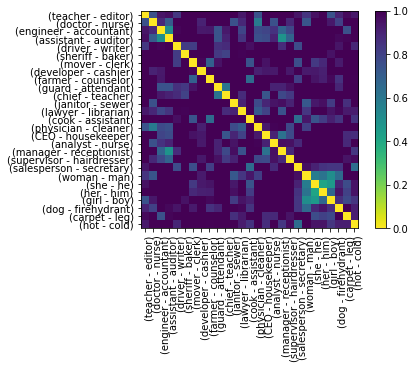

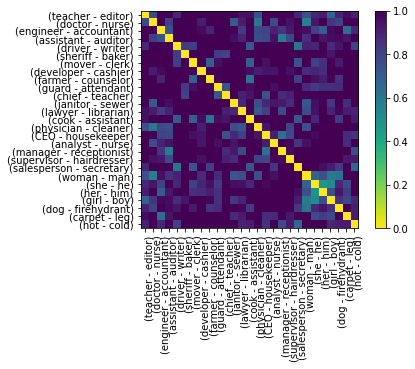

In [ ]:
def make_debias_correlation_plot(pairs, language_model, metric='cosine'):
    # Calculate the embeddings just like before.
    axes = [calc_axis(p, language_model) for p in pairs]
    emb_pairs = EmbeddingSet(*flatten(axes))

    # Calculate the "gender"-direction
    norm_emb = EmbeddingSet(
        (language_model['man'] - language_model['woman']),
        (language_model['king'] - language_model['queen']),
        (language_model['father'] - language_model['mother']),
         (language_model['teacher'] - language_model['editor']),
         (language_model['doctor'] -language_model['nurse']),
         (language_model['engineer']- language_model['accountant']),
         (language_model['assistant']- language_model['auditor']),
         (language_model['driver']-language_model['writer']),
        (language_model['sheriff']- language_model['baker']),
          (language_model['mover']- language_model['clerk']),
        (language_model['developer']- language_model['cashier']),
       (language_model['farmer']-language_model['counselor']),
        (language_model['guard']- language_model['attendant']),
        (language_model['chief']- language_model['teacher']),
        (language_model['janitor']- language_model['sewer'])

    ).average()

    # Project all embeddings away from this axis.
    emb_pairs = emb_pairs | norm_emb

    # Plot the result.
    emb_pairs.plot_distance(metric=metric)
make_correlation_plot(pairs=all_pairs, language_model=lang_ft)
make_debias_correlation_plot(pairs=all_pairs, language_model=lang_ft)